In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import lane_detection
import lane_following

In [2]:
IP_ADDRESS = "192.168.1.102"

In [3]:
vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")

img = None

MAX_RETRY = 100
count = 0
while count < MAX_RETRY:
    count += 1
    # Obtain the frame
    ret, frame = vcap.read()

    # Check frame was received successfully
    if ret:
        # got a frame, close the cap and return the frame
        print(" got a frame ")
        img = frame
        vcap.release()

vcap.release()

[tcp @ 0x123c3280] Connection to tcp://192.168.1.102:8554?timeout=0 failed: No route to host
[ERROR:0@4.108] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): rtsp://192.168.1.102:8554/rovcam in function 'icvExtractPattern'




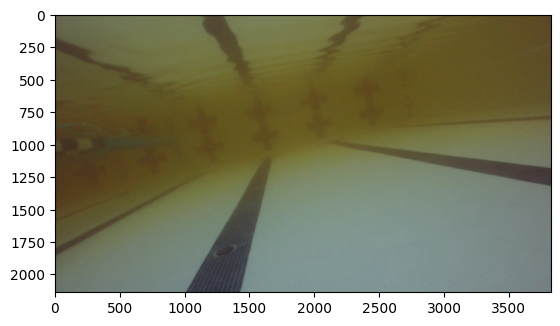

In [38]:
img = cv2.imread('lanes.png')
type(img)
img.shape
resized = (cv2.resize(img, (1912, 1069)))
# height = resized.shape[0]
# width = resized.shape[1]
# againResized = resized[int(height/2) : height, 0 : width]
# justincase = np.copy(againResized)
image = np.copy(resized)
imageLanes = np.copy(resized)
plt.imshow(img)

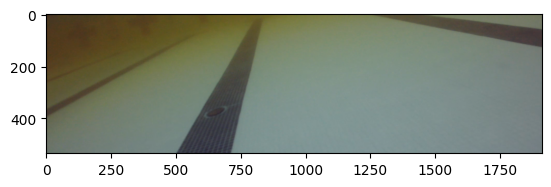

In [39]:
plt.imshow(againResized)

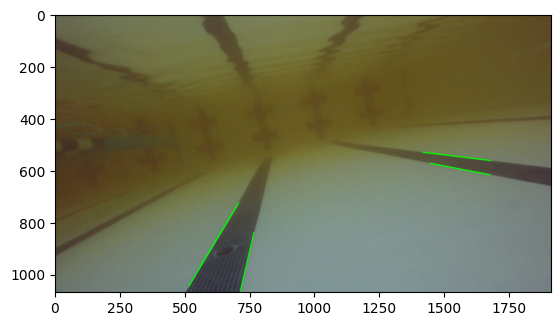

In [40]:
lines = lane_detection.detect_lines(image, 30, 100, 3, 229, 13)
plt.imshow(lane_detection.draw_lines(image, lines))

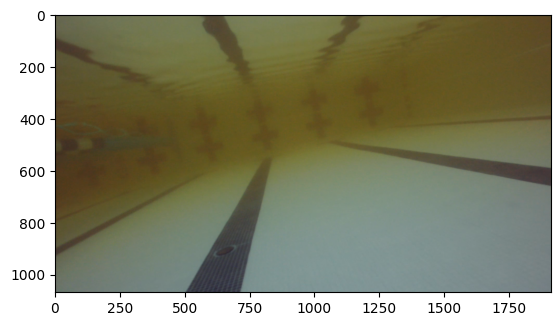

In [41]:
lanes = lane_detection.detect_lanes(img, lines)
lane_detection.draw_lanes(imageLanes, lanes)

In [42]:
print(f"Possible lines: {lines}")
print(f"Possible lanes: {lanes}")
print(f"Line slopes and intercepts: {lane_detection.get_slopes_intercepts(image, lines)}")

Possible lines: [[1415, 531, 1676, 563], [514, 1047, 699, 738], [1441, 573, 1674, 618], [712, 1068, 765, 839], [557, 973, 706, 725]]
Possible lanes: []
Line slopes and intercepts: ([0.12260536398467432, -1.6702702702702703, 0.19313304721030042, -4.320754716981132, -1.6644295302013423], [5803.0625, 500.8284789644013, 4009.177777777778, 711.768558951965, 499.3225806451613])


In [43]:
center = lane_following.get_lane_center(img, lanes)
action = lane_following.recommend_direction(img, center[0], center[1])
print(f"Center slope and intercept: {center}") # [-2.9955124936257014, 606.2985189581832]
print(f"Recommended action: strafe {action[0]} and turn {action[1]}")

IndexError: list index out of range